In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.optimize import fmin
from scipy.optimize import minimize

import math

<img src='images/0.png'></img>
<img src='images/1.png'></img>

In [2]:
students = pd.read_csv('data/ex2data1.txt', header=None)
students.columns = ['first_exam', 'second_exam', 'admission']
students.admission = students.admission.astype('bool')
students.head()

,first_exam,second_exam,admission
0,34.623660,78.024693,False
1,30.286711,43.894998,False
2,35.847409,72.902198,False
3,60.182599,86.308552,True
4,79.032736,75.344376,True


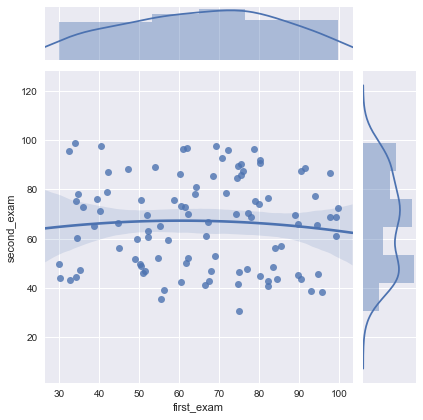

In [3]:
g = sns.JointGrid(data=students, x='first_exam', y='second_exam')
g.plot_joint(sns.regplot, order=2)  
g.plot_marginals(sns.distplot)  

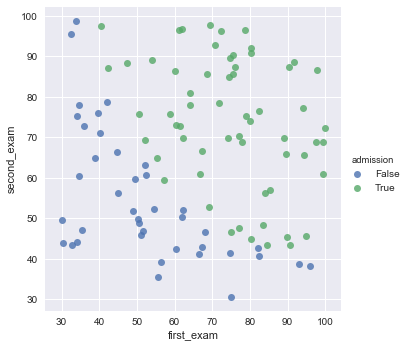

In [4]:
g = sns.lmplot(data=students, x='first_exam', y='second_exam', hue='admission', fit_reg=False)

<img src='images/2.png'></img>

In [5]:
def sigmoid(val):
     return 1/(1 + np.exp(-val))

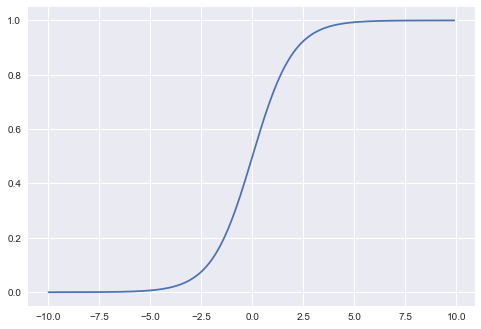

In [6]:
sig_x = np.arange(-10,10,.1)
plt.plot(sig_x, sigmoid(sig_x))

<img src='images/3.png'></img>
<img src='images/4.png'></img>

In [7]:
X = pd.DataFrame()
X['ones'] = np.ones(students.shape[0])
X = X.merge(students.iloc[:,0:2], left_index=True, right_index=True)
y = students.admission

X.head(2)
y.head(2)

,ones,first_exam,second_exam
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998


0    False
1    False
Name: admission, dtype: bool

In [8]:
def calculate_hypothesis(theta, X):
    val = np.sum(X*theta, axis=1)
    return sigmoid(val)
def calculate_cost_func(theta, X, y):
    m = X.shape[0]
    hypothesis = calculate_hypothesis(theta, X)
    return - np.sum((y * np.log(hypothesis)) + (1-y)*np.log(1-hypothesis))/m

In [9]:
theta = [0, 0, 0]

calculate_cost_func(theta, X, y)

0.6931471805599458

In [10]:
def perform_gradient_descent(theta, iterations, alpha):
    cost_history = []
    theta_history = []
    gradient_history = []
    m = X.shape[0]
    
    for i in range(0, iterations):
        #create new object for temp_theta
        temp_theta = list(theta)
        cost_history.append(calculate_cost_func(theta, X, y))
        theta_history.append(temp_theta)
        for ind, t in enumerate(temp_theta):
            gradient = alpha/m * np.sum((calculate_hypothesis(theta, X) - y)* X.iloc[:, ind])
            gradient_history.append(gradient)
            temp_theta[ind] = theta[ind] - gradient
        theta = temp_theta
    return cost_history, theta_history, gradient_history

In [11]:
theta = [0, 0, 0]

cost_history, theta_history, gradient_history = perform_gradient_descent(theta, 1, 1)
print(f'Expected cost is (approx): 0.693, calculated value is: {cost_history}')
print(f'Expected gradients (approx): -0.1000 -12.0092 -11.2628, calculated values are: {gradient_history}')
print()

theta = [-24, 0.2, 0.2]
cost_history, theta_history, gradient_history = perform_gradient_descent(theta, 1, 1)
print(f'Expected cost is (approx): 0.218, calculated value is: {cost_history}')
print(f'Expected gradients (approx): 0.043 2.566 2.647, calculated values are: {gradient_history}')


Expected cost is (approx): 0.693, calculated value is: [0.6931471805599458]
Expected gradients (approx): -0.1000 -12.0092 -11.2628, calculated values are: [-0.1, -12.009216589291148, -11.262842205513591]

Expected cost is (approx): 0.218, calculated value is: [0.21833019382659785]
Expected gradients (approx): 0.043 2.566 2.647, calculated values are: [0.04290299489953443, 2.566234115510756, 2.646797371082432]


<img src='images/5.png'></img>
<img src='images/6.png'></img>
<img src='images/7.png'></img>

In [12]:
theta = [0,0,0]
min_func = fmin(calculate_cost_func, theta, args=(X, y), maxiter=400)
print('Expected cost (approx): 0.203')
print('Expected theta (approx): -25.161 0.206 0.201')

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Expected cost (approx): 0.203
Expected theta (approx): -25.161 0.206 0.201


### Plot decision boundary
theta0 + theta1*x1 + theta2*x2 = 0

y = ax+b

-theta0 -theta1*x1 = theta2*x2

(-theta0 -theta1*x1)/theta2 = x2

In [13]:
theta0, theta1, theta2 = min_func

def get_decisionBoundary_values(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)
    return x, y
    
def calculate_min_func(x1):
    return (-theta0 -theta1*x1)/theta2

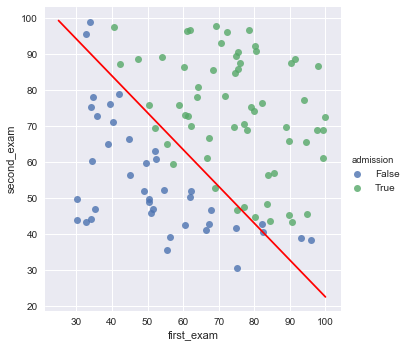

In [14]:
g = sns.lmplot(data=students, x='first_exam', y='second_exam', hue='admission', fit_reg=False)
bound_x, bound_y = get_decisionBoundary_values(calculate_min_func, np.linspace(25,100))
g.ax.plot(bound_x, bound_y, 'r')

In [15]:
def predict_admission_prob(first_exam, second_exam):
    val = np.sum(min_func * [1, first_exam, second_exam])
    return sigmoid(val)

print(f'Prediction for a student with scores 45 and 85.\nWe predict an admission probability of {predict_admission_prob(45,85)}')
print('Expected value: 0.775 +/- 0.002')


Prediction for a student with scores 45 and 85.
We predict an admission probability of 0.7762915904112411
Expected value: 0.775 +/- 0.002


In [16]:
from sklearn.metrics import accuracy_score
def predict(theta, X):
    return calculate_hypothesis(theta, X).apply(lambda x: 1 if x >= 0.5 else 0)

predicted = predict(min_func, X)
print(f'Train accuracy: {accuracy_score(y, predicted) * 100}')
print('Expected accuracy (approx): 89.0')

Train accuracy: 89.0
Expected accuracy (approx): 89.0


<img src='images/8.png'></img>
<img src='images/9.png'></img>
<img src='images/10.png'></img>
<img src='images/11.png'></img>

In [17]:
chips = pd.read_csv('data/ex2data2.txt', header=None)
chips.columns = ['first_test', 'second_test', 'accepted']
chips.accepted = chips.accepted.astype('bool')
chips.head()

,first_test,second_test,accepted
0,0.051267,0.69956,True
1,-0.092742,0.68494,True
2,-0.213710,0.69225,True
3,-0.375000,0.50219,True
4,-0.513250,0.46564,True


In [18]:
X = pd.DataFrame()
X['ones'] = np.ones(chips.shape[0])
X = X.merge(chips.iloc[:,0:2], left_index=True, right_index=True)
y = chips.accepted

X.head(2)
y.head(2)

,ones,first_test,second_test
0,1.0,0.051267,0.69956
1,1.0,-0.092742,0.68494


0    True
1    True
Name: accepted, dtype: bool

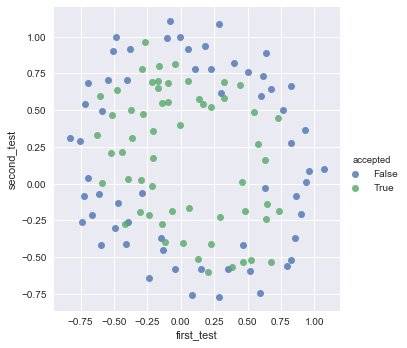

In [19]:
g = sns.lmplot(data=chips, x='first_test', y='second_test', hue='accepted', fit_reg=False)

In [157]:
def calculate_cost_func_with_reg(theta, X, y, lam=0):
    m = X.shape[0]
    hypothesis = calculate_hypothesis(theta, X)
    cost = - np.sum((y * np.log(hypothesis)) + (1-y)*np.log(1-hypothesis))/m
    return cost + lam*np.sum(np.power(theta[1:],2))/(2*m)

def perform_gradient_descent_with_reg(theta, X, y, lam=0, iterations=1, alpha=1):
    cost_history = []
    theta_history = []
    gradient_history = []
    m = X.shape[0]
    for i in range(0, iterations):
        #create new object for temp_theta
        temp_theta = list(theta)
        cost_history.append(calculate_cost_func_with_reg(theta, X, y, lam))
        theta_history.append(theta)
        for ind, t in enumerate(temp_theta):
            gradient = alpha/m * np.sum((calculate_hypothesis(theta, X) - y)* X.iloc[:, ind])
            #first theta should not be regularized!
            regularization = 0
            if ind is not 0:
                regularization = lam/m*theta[ind]
            gradient = gradient + regularization
            gradient_history.append(gradient)
            temp_theta[ind] = theta[ind] - gradient
        theta = temp_theta
    return cost_history, theta_history, gradient_history

In [35]:
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )
    columns = []
    columns.append('ones')
    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            column_name = f'x1^{i-j}x2^{j}'
            columns.append(column_name)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out, columns
    
def get_lims(g):
    return g.ax.get_xlim(), g.ax.get_ylim()
    
def get_transformed_df(df):
    df, columns = mapFeature(df.iloc[:,1], df.iloc[:, 2])
    df = pd.DataFrame(df)
    df.columns = columns
    return df

In [38]:
mappedX = get_transformed_df(X)
mappedX.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


,ones,x1^1x2^0,x1^0x2^1,x1^2x2^0,x1^1x2^1,x1^0x2^2,x1^3x2^0,x1^2x2^1,x1^1x2^2,x1^0x2^3,...,x1^2x2^3,x1^1x2^4,x1^0x2^5,x1^6x2^0,x1^5x2^1,x1^4x2^2,x1^3x2^3,x1^2x2^4,x1^1x2^5,x1^0x2^6
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256


In [127]:
theta = np.zeros(mappedX.shape[1])
lam = 1

cost_history, theta_history, gradient_history = perform_gradient_descent_with_reg(theta, mappedX, y, lam=1)
print(f'Expected cost is (approx): 0.693, calculated value is: {cost_history}')
print(f'Expected gradients (approx): 0.0085 0.0188 0.0001 0.0503 0.0115.\nCalculated values are:')
print([f'%.4f' % elem for elem in gradient_history[0:5]])


Expected cost is (approx): 0.693, calculated value is: [0.69314718055994606]
Expected gradients (approx): 0.0085 0.0188 0.0001 0.0503 0.0115.
Calculated values are:
['0.0085', '0.0188', '0.0001', '0.0503', '0.0115']


In [134]:
test_theta = np.ones(mappedX.shape[1])
lam = 10

cost_history, theta_history, gradient_history = perform_gradient_descent_with_reg(test_theta, mappedX, y, lam)
print(f'Cost at test theta (with lambda = {lam}):')
print(f'Expected cost is (approx): 3.16, calculated value is: {cost_history}')
print(f'Expected gradients (approx): 0.3460 0.1614 0.1948 0.2269 0.0922.\nCalculated values are:')
print([f'%.4f' % elem for elem in gradient_history[0:5]])


Cost at test theta (with lambda = 10):
Expected cost is (approx): 3.16, calculated value is: [3.1645093316150104]
Expected gradients (approx): 0.3460 0.1614 0.1948 0.2269 0.0922.
Calculated values are:
['0.3460', '0.1614', '0.1948', '0.2269', '0.0922']


In [51]:
theta = np.zeros(mappedX.shape[1])
lam = 1

min_fun = minimize(calculate_cost_func_with_reg, theta, args=(mappedX, y, lam), options={"maxiter":400, "disp":False} )
theta = min_fun.x
theta

array([ 1.27268727,  0.62557   ,  1.18096669, -2.01919764, -0.91761488,
       -1.43194214,  0.12375902, -0.36513106, -0.35703385, -0.17485808,
       -1.45843752, -0.0512966 , -0.61604024, -0.2746416 , -1.19282544,
       -0.24270336, -0.20570072, -0.04499735, -0.27782721, -0.29525873,
       -0.45613301, -1.04377852,  0.02762814, -0.29265667,  0.01543369,
       -0.32759366, -0.14389201, -0.92460139])

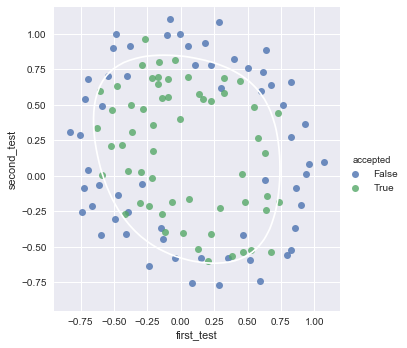

In [50]:
g = sns.lmplot(data=chips, x='first_test', y='second_test', hue='accepted', fit_reg=False)

x_lim = get_lims(g)[0]
y_lim = get_lims(g)[0]

u = np.linspace(x_lim[0], x_lim[1])
v = np.linspace(y_lim[0], y_lim[1])
ar = np.zeros((len(u),len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        features, _ = mapFeature(np.array([u[i]]),np.array([v[j]]))
        ar[i][j] = np.dot(features, theta)

z = ar.transpose()
u, v = np.meshgrid(u, v)

g.ax.contour(u, v, z, [0])

In [42]:
from sklearn.metrics import accuracy_score
def predict(theta, X):
    return calculate_hypothesis(theta, X).apply(lambda x: 1 if x >= 0.5 else 0)

predicted = predict(theta, mappedX)
print(f'Train accuracy: {accuracy_score(y, predicted) * 100}')
print('Expected accuracy (with lambda = 1): 83.1')

Train accuracy: 83.05084745762711
Expected accuracy (with lambda = 1): 83.1


<img src='images/12.png'></img>
<img src='images/13.png'></img>


In [179]:
def perform_gradient_with_summary(lam, theta):
    min_fun = minimize(calculate_cost_func_with_reg, theta, args=(mappedX, y, lam), options={"maxiter":400, "disp":False} )
    theta = min_fun.x
    
    g = sns.lmplot(data=chips, x='first_test', y='second_test', hue='accepted', fit_reg=False)
    title = 'Decision boundary and data with acceptance information for lambda: ', lam
    plt.title(title)
    
    x_lim = get_lims(g)[0]
    y_lim = get_lims(g)[0]
    u = np.linspace(x_lim[0], x_lim[1])
    v = np.linspace(y_lim[0], y_lim[1])

    ar = np.zeros((len(u),len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            features, _ = mapFeature(np.array([u[i]]),np.array([v[j]]))
            ar[i][j] = np.dot(features, theta)

    z = ar.transpose()
    u, v = np.meshgrid(u, v)

    g.ax.contour(u, v, z, [0])
    predicted = predict(theta, mappedX)
    print(f'Train accuracy for lambda {lam} is: {accuracy_score(y, predicted) * 100}')

Train accuracy for lambda 0 is: 88.13559322033898
Train accuracy for lambda 1 is: 83.05084745762711
Train accuracy for lambda 10 is: 74.57627118644068
Train accuracy for lambda 50 is: 66.94915254237289
Train accuracy for lambda 100 is: 61.016949152542374


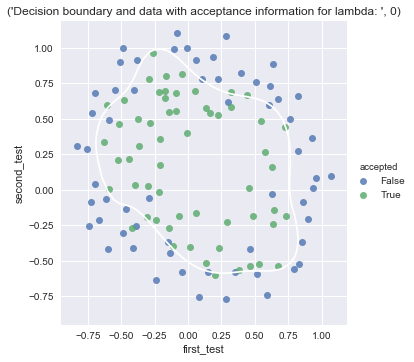

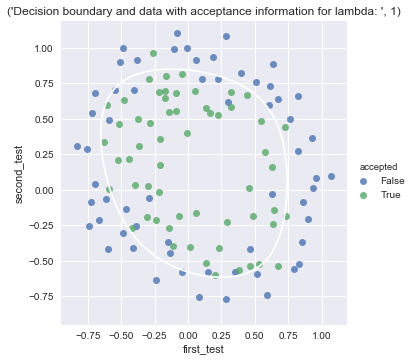

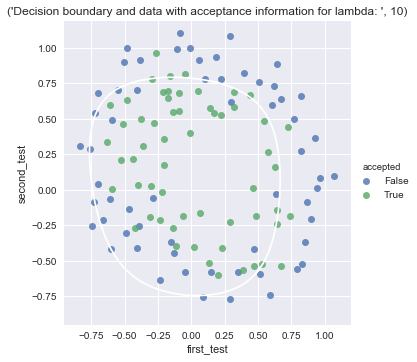

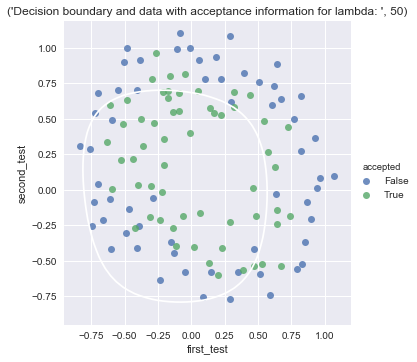

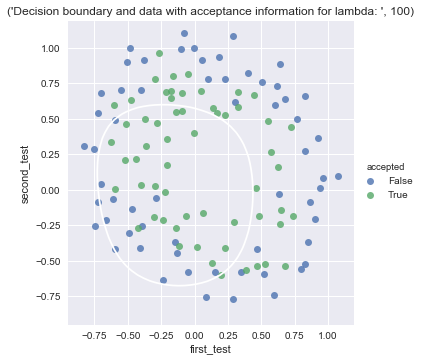

In [180]:
for lam in [0, 1, 10, 50,100]:
    theta = np.zeros(mappedX.shape[1])
    perform_gradient_with_summary(lam, theta)